# Вариант 11
## Егоров Алексей БПМ214

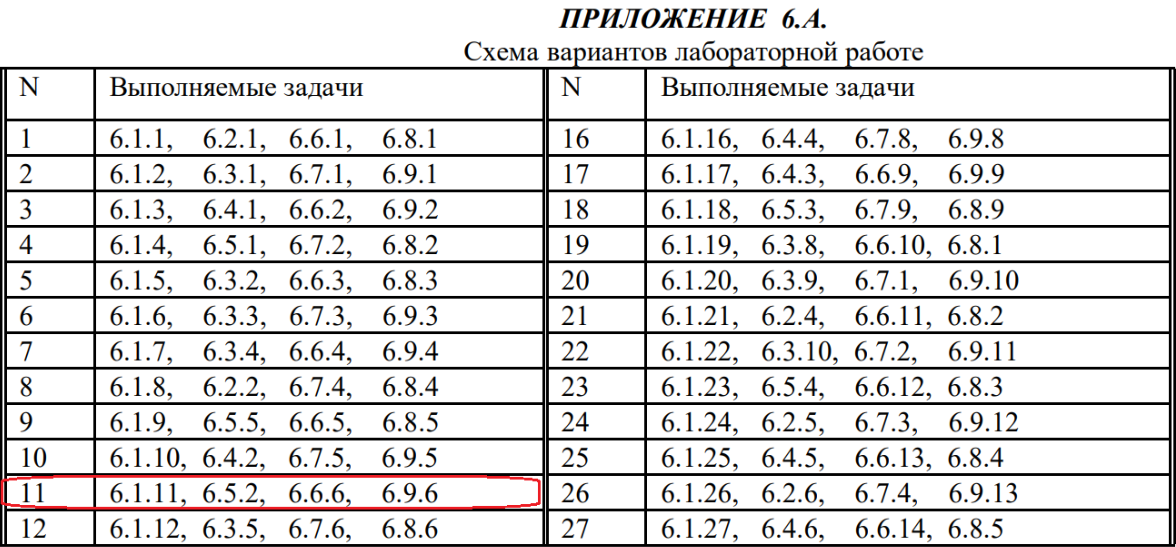

### 6.1.11

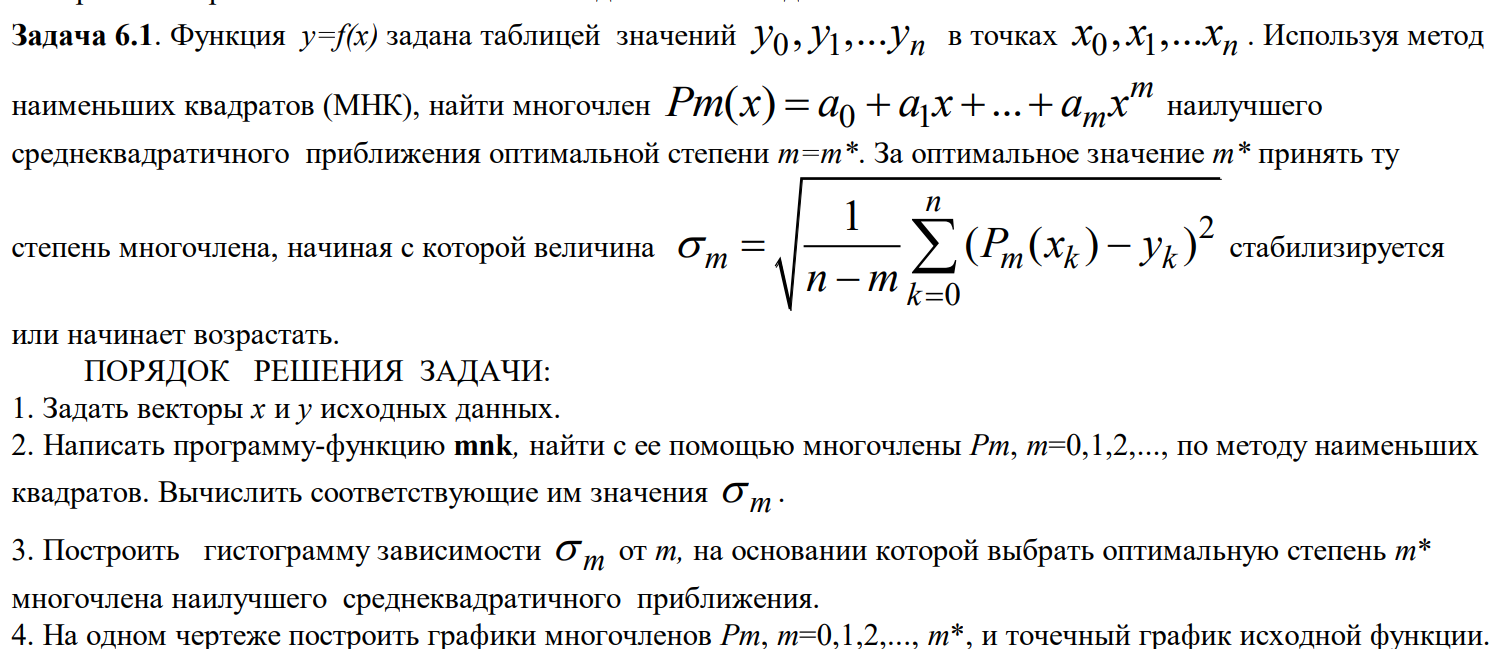

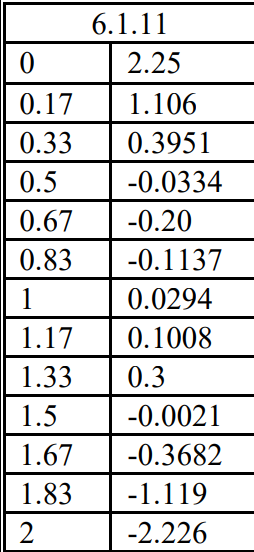

In [1]:
import numpy as np

In [2]:
xs = np.array([0, 0.17, 0.33, 0.5, 0.67, 0.83, 1, 1.17, 1.33, 1.5, 1.67, 1.83, 2])
ys = np.array([2.25, 1.106, 0.3951, -0.0334, -0.20, -0.1137, 0.0294, 0.1008, 0.3, -0.0021, -0.3682, -1.119, -2.226])

In [3]:
import matplotlib.pyplot as plt

In [4]:
def mnk(x, y, m):
    b = np.zeros(m + 1)
    G = np.zeros([m + 1, m + 1])
    for j in range(m + 1):
        b[j] = np.sum(y * x ** j)
        for k in range(m + 1):
            G[j][k] = np.sum(x ** (k + j))
    a = np.linalg.solve(G, b)
    return a

In [5]:
def mnk_plot(ax, xs, ys, m): 
    coeffs_m = mnk(xs, ys, m)
    x = np.linspace(0, 2, 200)
    y = np.polyval(coeffs_m[::-1], x)
    ax.scatter(xs, ys, marker="x", color="red", label='Табличные данные')
    ax.plot(x, y, linewidth=0.5, color='g', label='Полученный многочлен')
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("y")

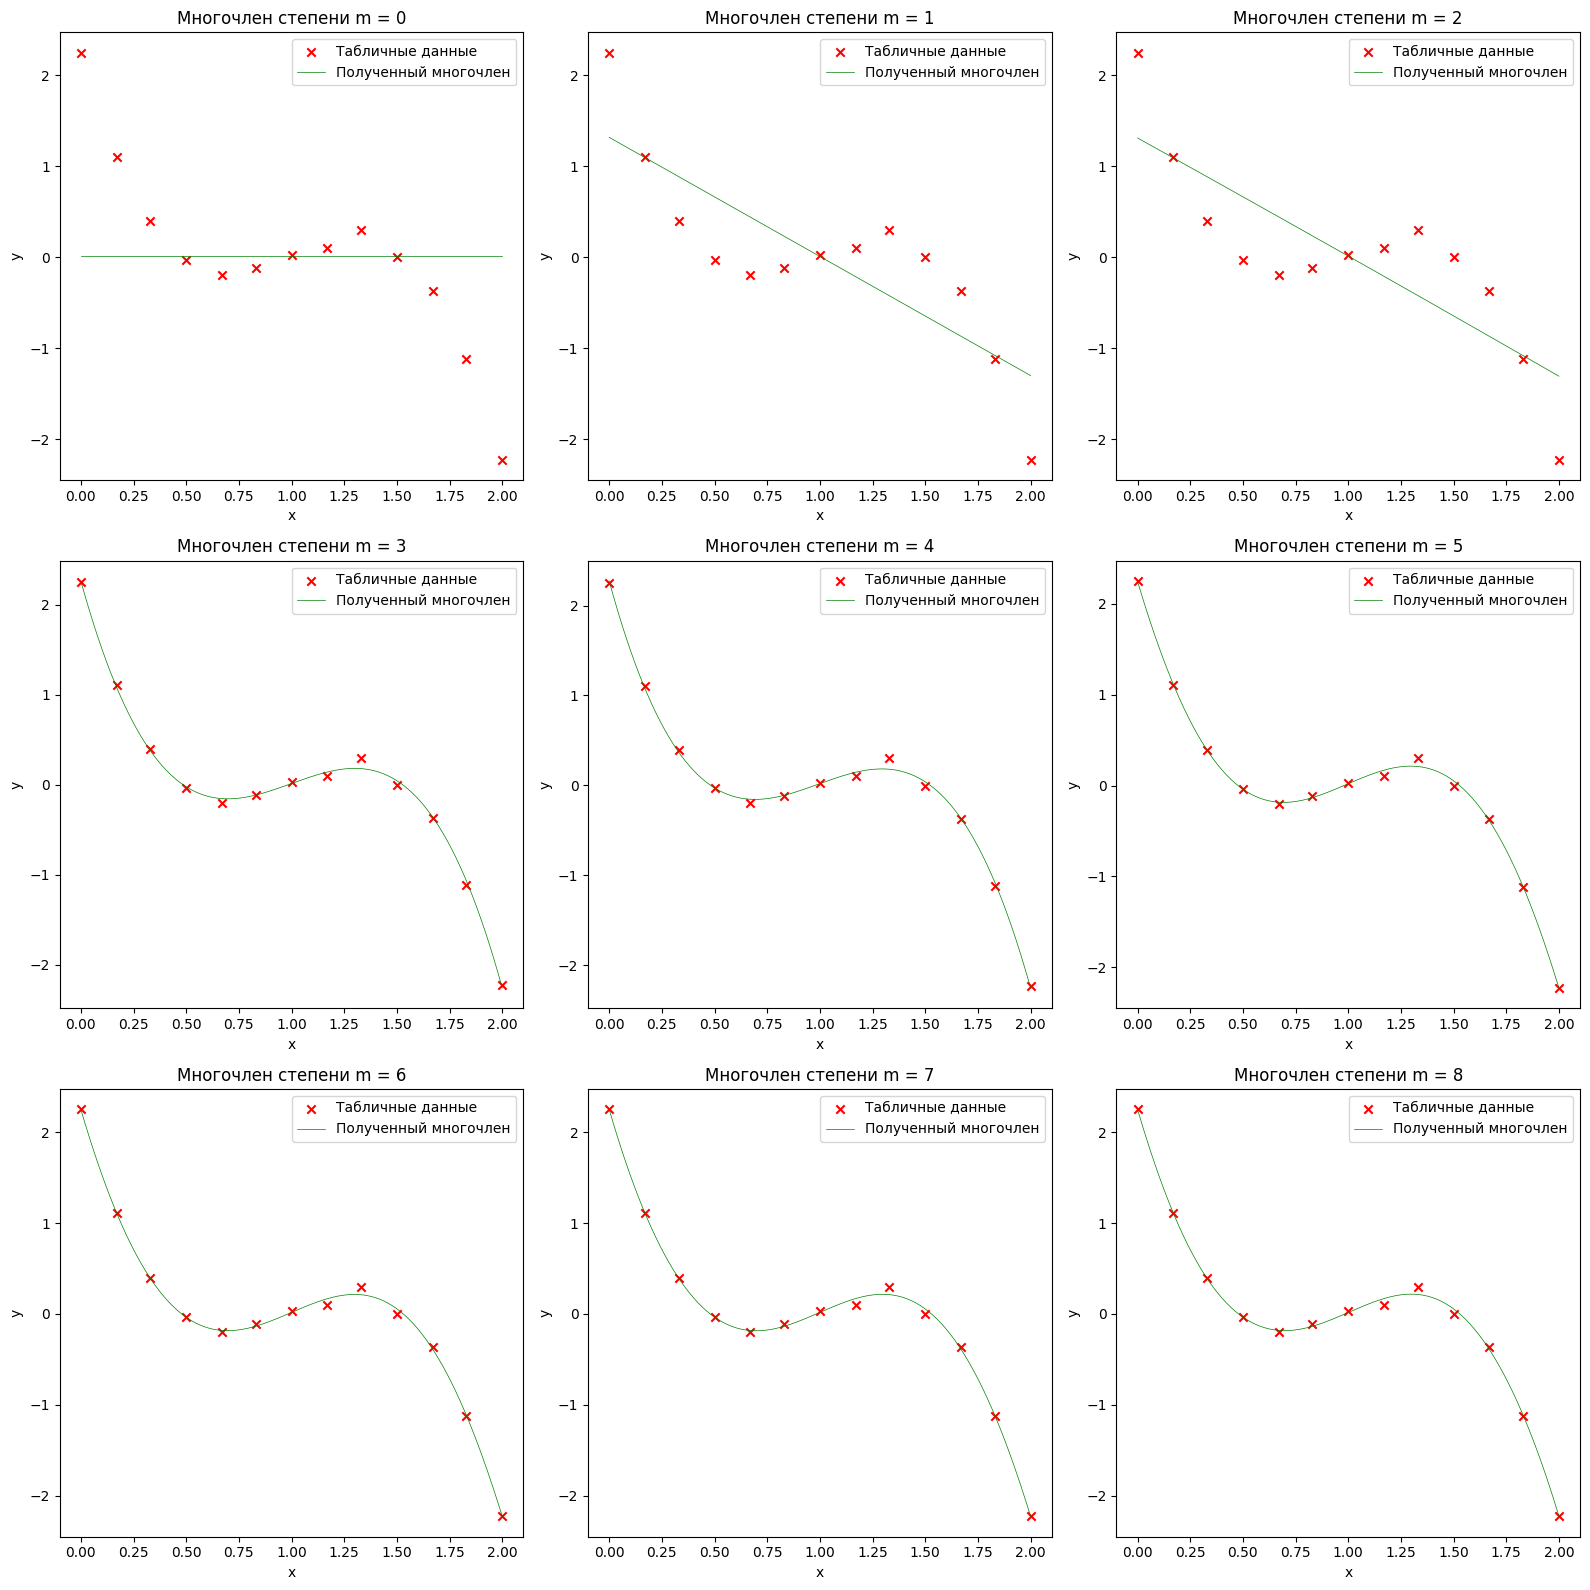

In [6]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16, 16), layout="tight")
for m, ax in enumerate(axs.flatten()):
    mnk_plot(ax, xs, ys, m)
    ax.set_title(f"Многочлен степени m = {m}")

In [15]:
def P(coeffs_m, t):
    return np.sum([coeffs_m[i] * t ** i for i in range(len(coeffs_m))])

def sigma(m, coeffs_m, xs, ys):
    n = len(ys)
    m = len(coeffs_m) - 1
    return np.sqrt(1 / (n - m) * (np.sum((P(coeffs_m, xs) - ys) ** 2)))


Text(0, 0.5, '$\\sigma$')

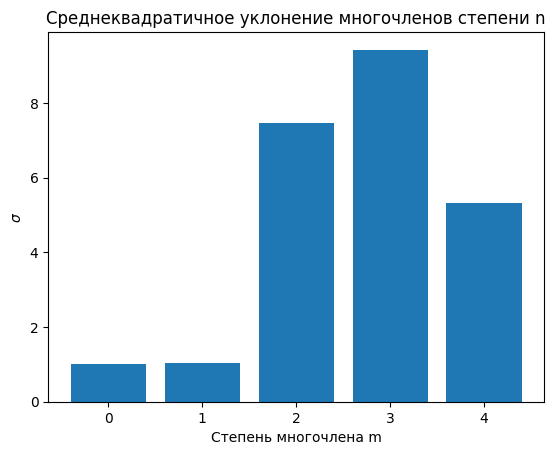

In [18]:
plt.bar(sigma_m, sigma_nums)
plt.title('Среднеквадратичное уклонение многочленов степени n')
plt.xlabel('Степень многочлена m')
plt.ylabel('$\sigma$')

In [14]:
coeffs_m = mnk(xs, ys, 8)[::-1]

print('Многочлен наилучшего среднеквадратичного приближения:')

for i, c in enumerate(coeffs_m):
    if i == 0:
        print(f'{c}', end='')
    else:
        print(f' + {c}*x^{i}', end='')

Многочлен наилучшего среднеквадратичного приближения:
-0.3138696907692443 + 2.3819784764241945*x^1 + -7.168035817898583*x^2 + 11.297667436700438*x^3 + -10.828812872268198*x^4 + 4.053937547917195*x^5 + 6.17699329696666*x^6 + -7.8341305615803485*x^7 + 2.249594834439984*x^8

**Вывод:** оптимальная степень m*=4; многочлен наилучшего среднеквадратичного приближения:
</br>
*0.06045909909599615 + -3.3479604251808848*x^1 + 9.61060739180531*x^2 + -8.575331867039898*x^3 + 2.272483058424502*x^4*

In [9]:
import colorsys

def spectrum(n : int):
    hsv = [(h, 1, 1) for h in np.linspace(0, 240/360, n)]
    rgb = [colorsys.hsv_to_rgb(*tup) for tup in hsv]
    defloat = lambda x: tuple((int(255 * i) for i in x))
    return ['#%02x%02x%02x' % defloat(x) for x in rgb]

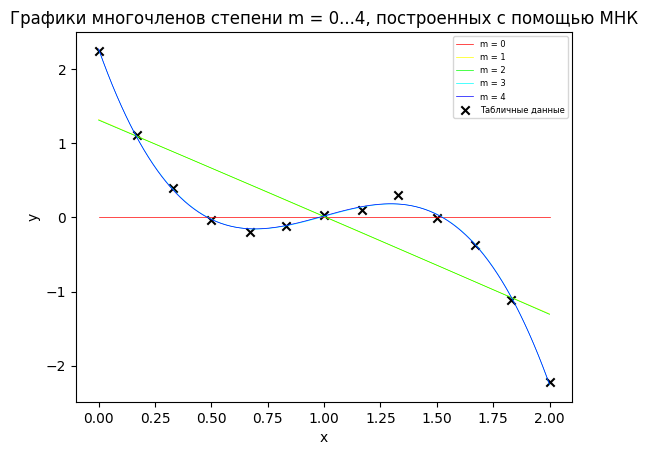

In [17]:
Ms = 4
rgb = np.array(spectrum(Ms + 1))

sigma_nums = []
sigma_m = []

for m in range(Ms + 1):
    coeffs_m = mnk(xs, ys, m)[::-1]
    
    x = np.linspace(0, 2, 200)
    y = np.polyval(coeffs_m, x)

    plt.plot(x, y, linewidth=0.5, color=rgb[m], label=f'm = {m}')
    
    sigma_nums.append(sigma(m, coeffs_m, xs, ys))
    sigma_m.append(m)

plt.scatter(xs, ys, marker="x", color='black', label='Табличные данные')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Графики многочленов степени m = 0...{m}, построенных с помощью МНК')
plt.legend(prop={'size': 6})
plt.show()

### 6.5.2

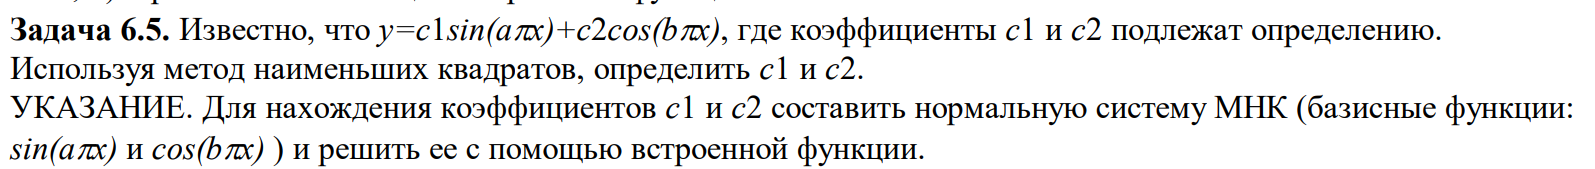

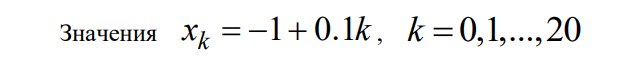

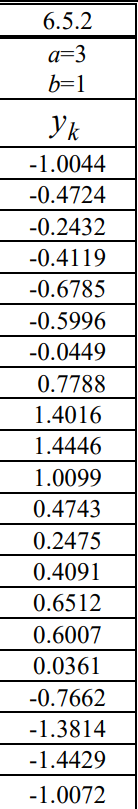

In [178]:
xs = [-1 + 0.1 * k for k in range(21)]
ys = [-1.0044, -0.4724, -0.2432, -0.4119,
      -0.6785, -0.5996, -0.0449, 0.7788,
      1.4016, 1.4446, 1.0099, 0.4743, 0.2475,
      0.4091, 0.6512, 0.6007, 0.0361, -0.7662,
      -1.3814, -1.4429, -1.0072]

In [181]:
import sympy as sym

In [230]:
def func(x, y, c1, c2, a = 3, b = 1):
    return (y - (c1*sym.sin(a*sym.pi*x) + c2*sym.cos(b*sym.pi*x))) ** 2
x, y, c1, c2, a, b = sym.symbols('x y c1 c2 a b')

def fdiff_c1(x,y, c1, c2):
    return sym.diff(func(x,y, c1, c2), c1)

def fdiff_c2(x,y, c1, c2):
    return sym.diff(func(x,y, c1, c2), c2)


In [227]:
from sympy.solvers import solve

In [259]:
eq1, eq2 = 0, 0
for xi, yi in zip(xs, ys):
    eq1 += fdiff_c1(x, y, c1, c2).evalf(subs={x: xi, y: yi})
    eq2 += fdiff_c2(x, y, c1, c2).evalf(subs={x: xi, y: yi})


output = solve([eq1,eq2],dict=True)
c_1, c_2 = list(output[0].values())[0], list(output[0].values())[1]
print(f'c1 = {c_1}')
print(f'c2 = {c_2}')

c1 = -0.600346399432275
c2 = 1.00846265973310


In [260]:
ys2 = np.array([c_1 * np.sin(3 * x * np.pi) + c_2 * np.cos(1 * x * np.pi) for x in np.linspace(-1, 1, 100)])

[]

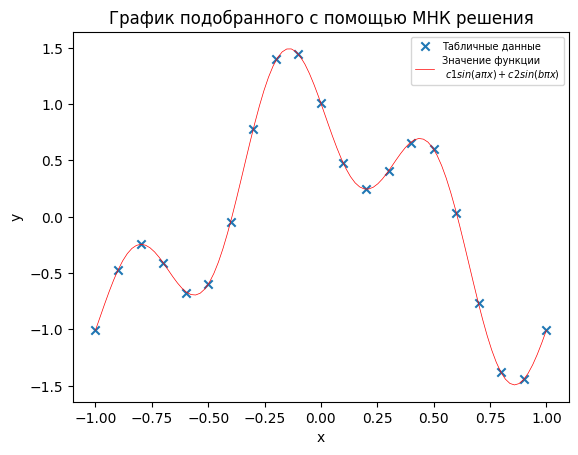

In [320]:
plt.scatter(xs, ys, marker="x", label='Табличные данные')
plt.plot(np.linspace(-1, 1, 100), ys2, linewidth=0.5, c='r', label='Значение функции\n $c1sin(a\pi x) + c2sin(b\pi x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(prop={'size': 7})
plt.title('График подобранного с помощью МНК решения')
plt.plot()

### 6.6.6

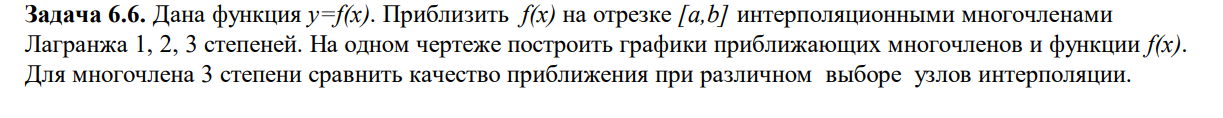

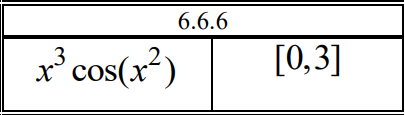

In [271]:
from scipy.interpolate import lagrange

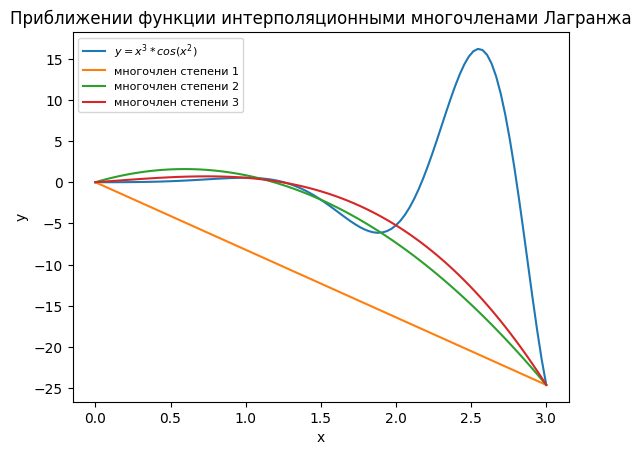

In [322]:
xlin = np.linspace(0, 3, 100)
ylin = xlin**3*np.cos(xlin**2)
plt.plot(xlin, ylin, label='$y = x^3*cos(x^2)$')

for i in range(2, 5):
    x = np.linspace(0, 3, i)
    y = x**3*np.cos(x**2)
    poly = lagrange(x, y)
    y_poly = poly(xlin)
    plt.plot(xlin, y_poly, label=f'многочлен степени {i - 1}')

plt.title('Приближении функции интерполяционными многочленами Лагранжа')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(prop={'size': 8})
plt.show()

In [529]:
from sympy import *
from scipy.optimize import fminbound

In [635]:
x = symbols('x')

def error_rate(z):
    def w(x_):
        w = 1
        for zi in z:
            w *= x_ - zi
            
        return abs(w)
    
    def df(x_):
        expr = diff(x**3*cos(x**2), x, len(z))
        f = lambdify(x, expr, "numpy")
        
        return abs(f(x_))
    
    M = df(fminbound(lambda x: -df(x), 0, 3))
    res = M/24*w(fminbound(lambda x: -w(x), 0, 3))
    
    return res

In [619]:
import random

Для графика №1:

max|f(x)-L(x)| ≤ 583.81 для узлов: [0.62 0.69 2.31 2.46]

max|f(x)-L(x)| ≤ 1343.39 для узлов: [0.54 0.69 2.54 3.  ]

max|f(x)-L(x)| ≤ 29682.61 для узлов: [1.92 2.15 2.46 2.77]

max|f(x)-L(x)| ≤ 16669.95 для узлов: [1.38 1.54 2.62 2.85]

Для графика №2:

max|f(x)-L(x)| ≤ 16020.63 для узлов: [0.   0.62 0.69 2.08]

max|f(x)-L(x)| ≤ 430.08 для узлов: [0.31 1.31 1.92 2.08]

max|f(x)-L(x)| ≤ 20499.54 для узлов: [0.   0.38 1.38 1.46]

max|f(x)-L(x)| ≤ 13968.92 для узлов: [0.46 1.08 1.23 1.46]

Для графика №3:

max|f(x)-L(x)| ≤ 2565.4 для узлов: [1.15 1.31 2.08 2.15]

max|f(x)-L(x)| ≤ 11250.96 для узлов: [1.31 1.54 2.23 2.38]

max|f(x)-L(x)| ≤ 41979.72 для узлов: [0.23 0.46 0.54 0.69]

max|f(x)-L(x)| ≤ 2504.77 для узлов: [0.38 0.62 1.31 3.  ]

Для графика №4:

max|f(x)-L(x)| ≤ 437.3 для узлов: [0.46 0.54 1.69 2.92]

max|f(x)-L(x)| ≤ 159.24 для узлов: [1.08 1.31 2.15 3.  ]

max|f(x)-L(x)| ≤ 169.85 для узлов: [1.15 2.   2.15 2.85]

max|f(x)-L(x)| ≤ 398.42 для узлов: [0.08 0.77 1

Text(0.5, 0.98, 'Приближении функции интерполяционными многочленами Лагранжа\n')

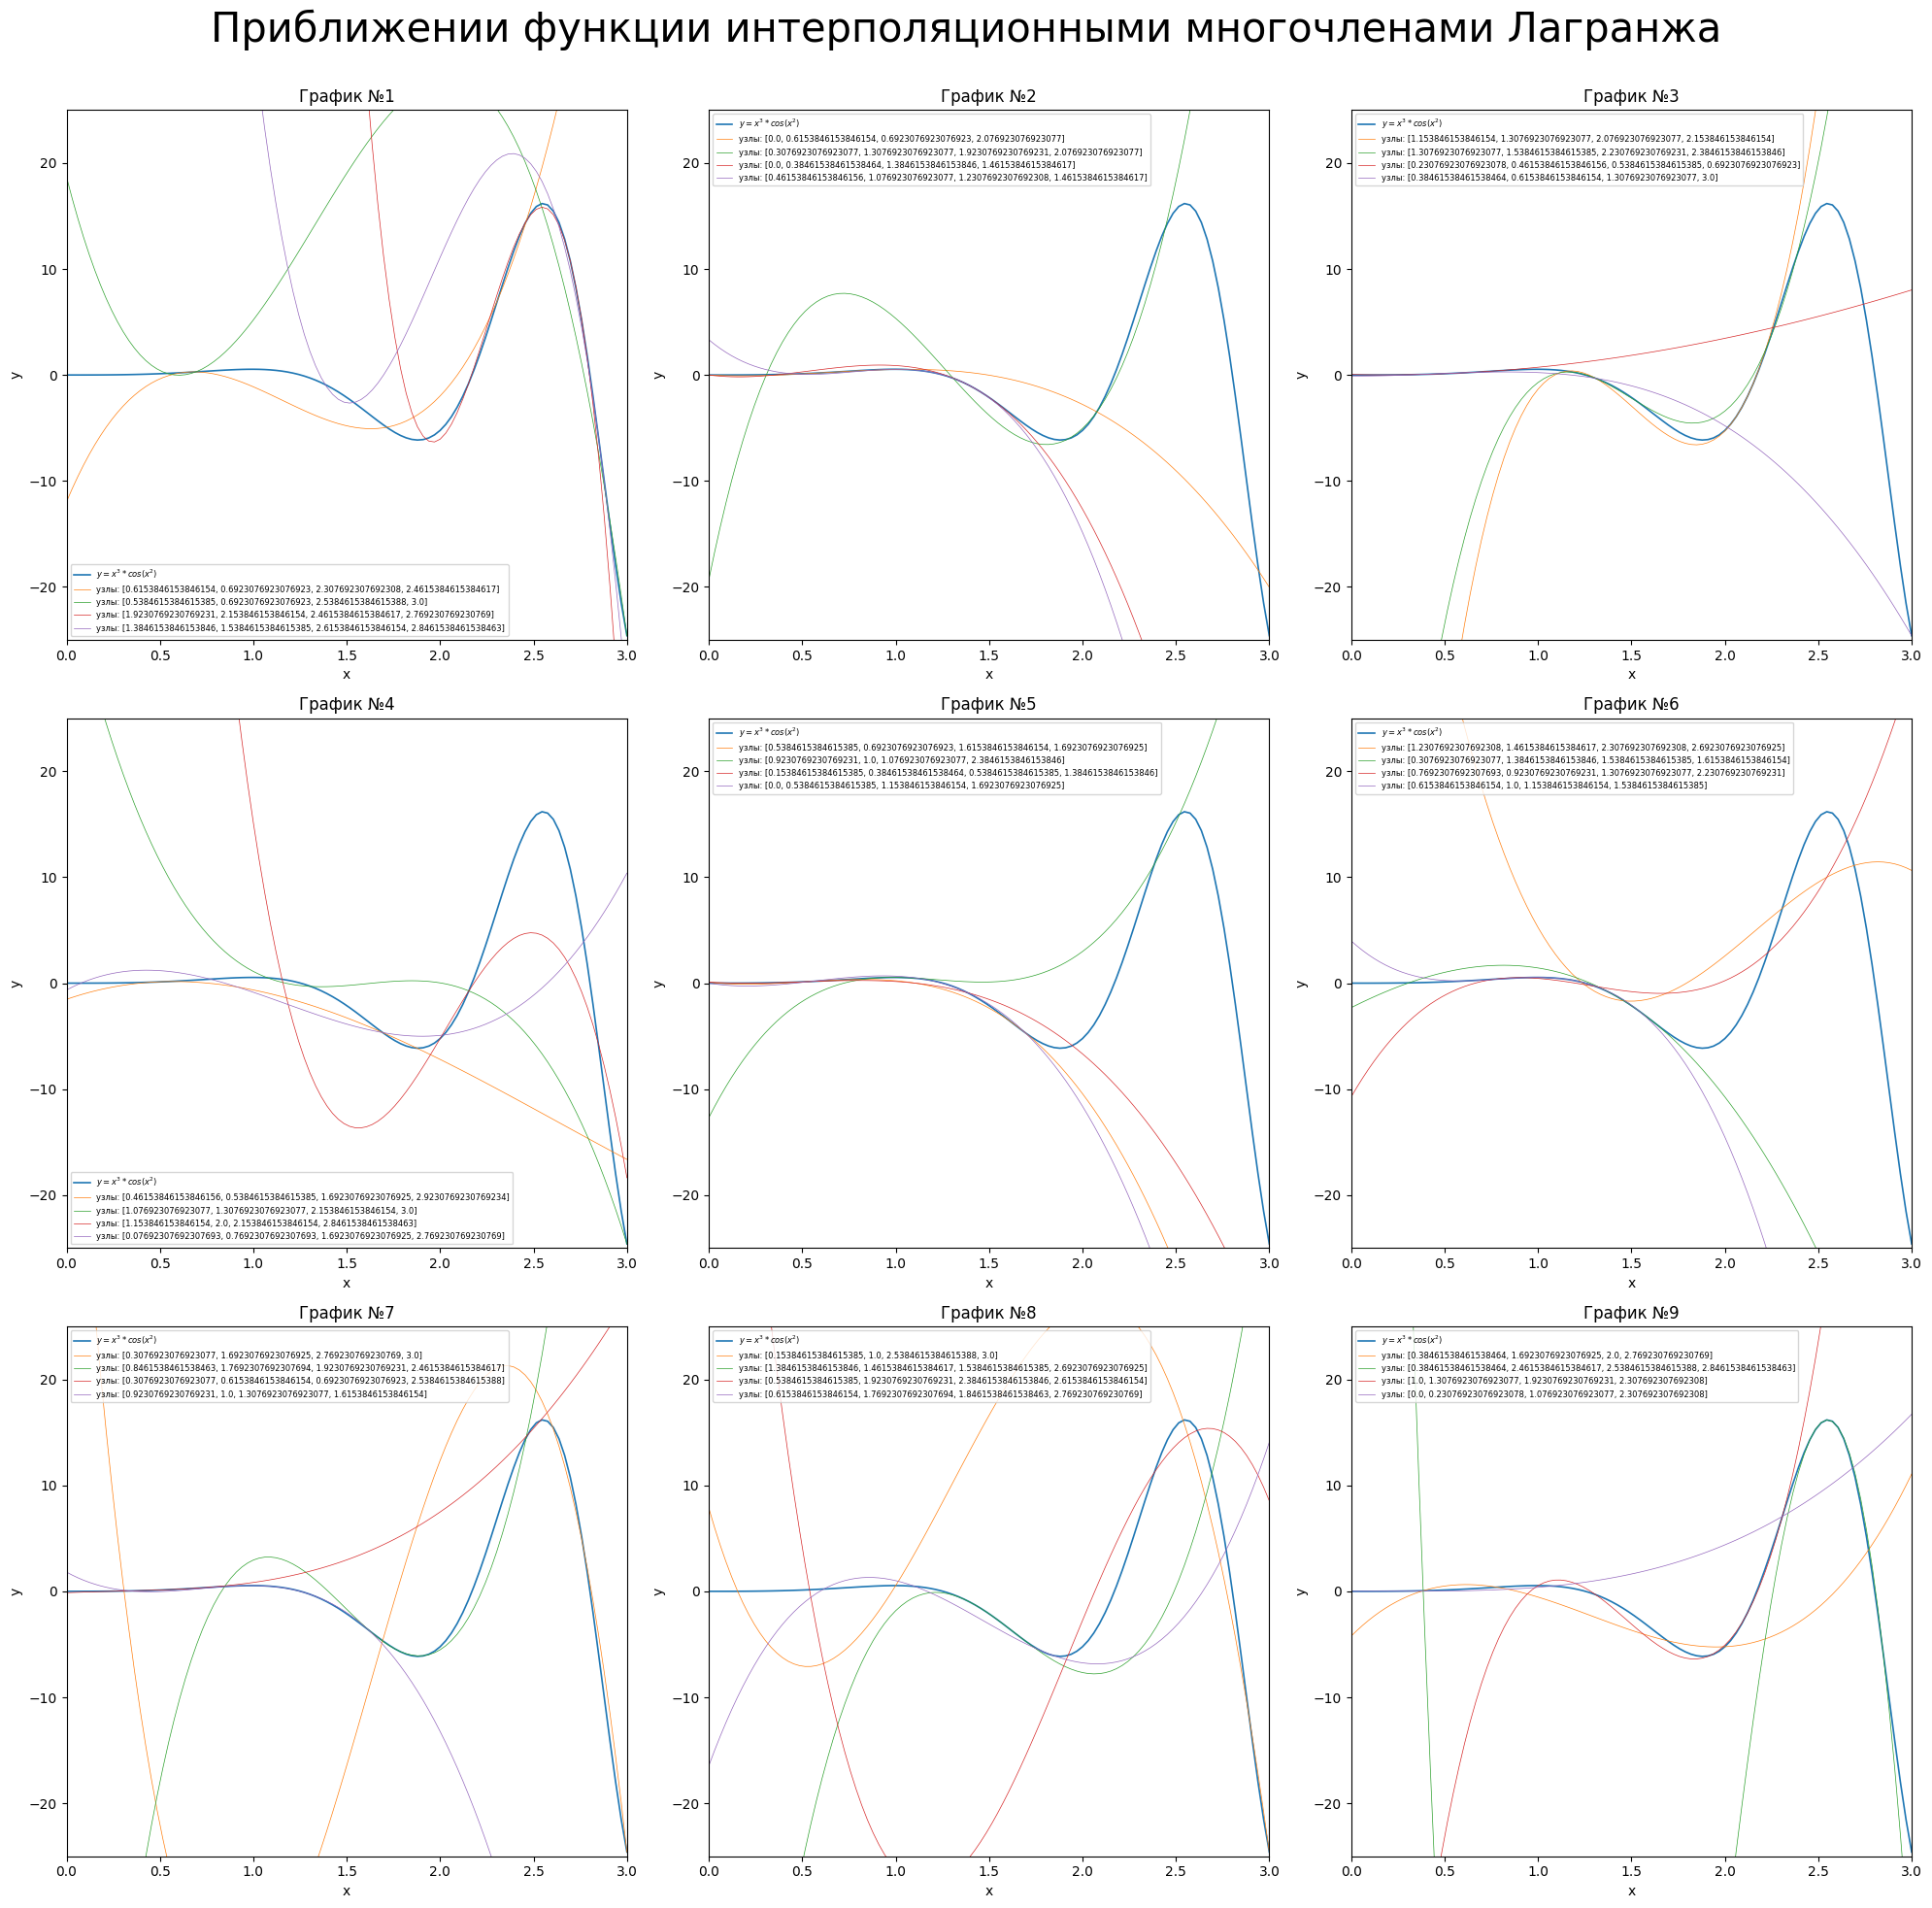

In [637]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), layout="tight")

xlin = np.linspace(0, 3, 100)
ylin = xlin**3*np.cos(xlin**2)

reses = {}

for i, ax in enumerate(axs.flatten()):
    
    ax.plot(xlin, ylin,linewidth=1.2, label='$y = x^3*cos(x^2)$')
    print('\033[1m' + f"Для графика №{i + 1}:\n" + '\033[0m')
    
    for _ in range(4):
        xlin2 = np.linspace(0, 3, 40)
        xl = np.array(sorted(random.sample(list(xlin2), 4)))
        z = xl.copy()
        res = error_rate(list(z))
        print(f"max|f(x)-L(x)| ≤ {round(res, 2)} для узлов: {np.round(z, 2)}\n")
        y = xl**3*np.cos(xl**2)
        poly = lagrange(xl, y)
        reses[res] = poly
        y_poly = poly(xlin)
        ax.plot(xlin, y_poly, linewidth=0.5, label=f"узлы: [{', '.join(map(str,xl))}]")

    ax.set_xlabel("x")
    ax.set_title(f'График №{i + 1}')
    ax.set_ylabel("y")
    ax.set_xlim(0, 3)
    ax.set_ylim(-25, 25)
    ax.legend(prop={'size': 6})

fig.suptitle('Приближении функции интерполяционными многочленами Лагранжа\n', fontsize=30)

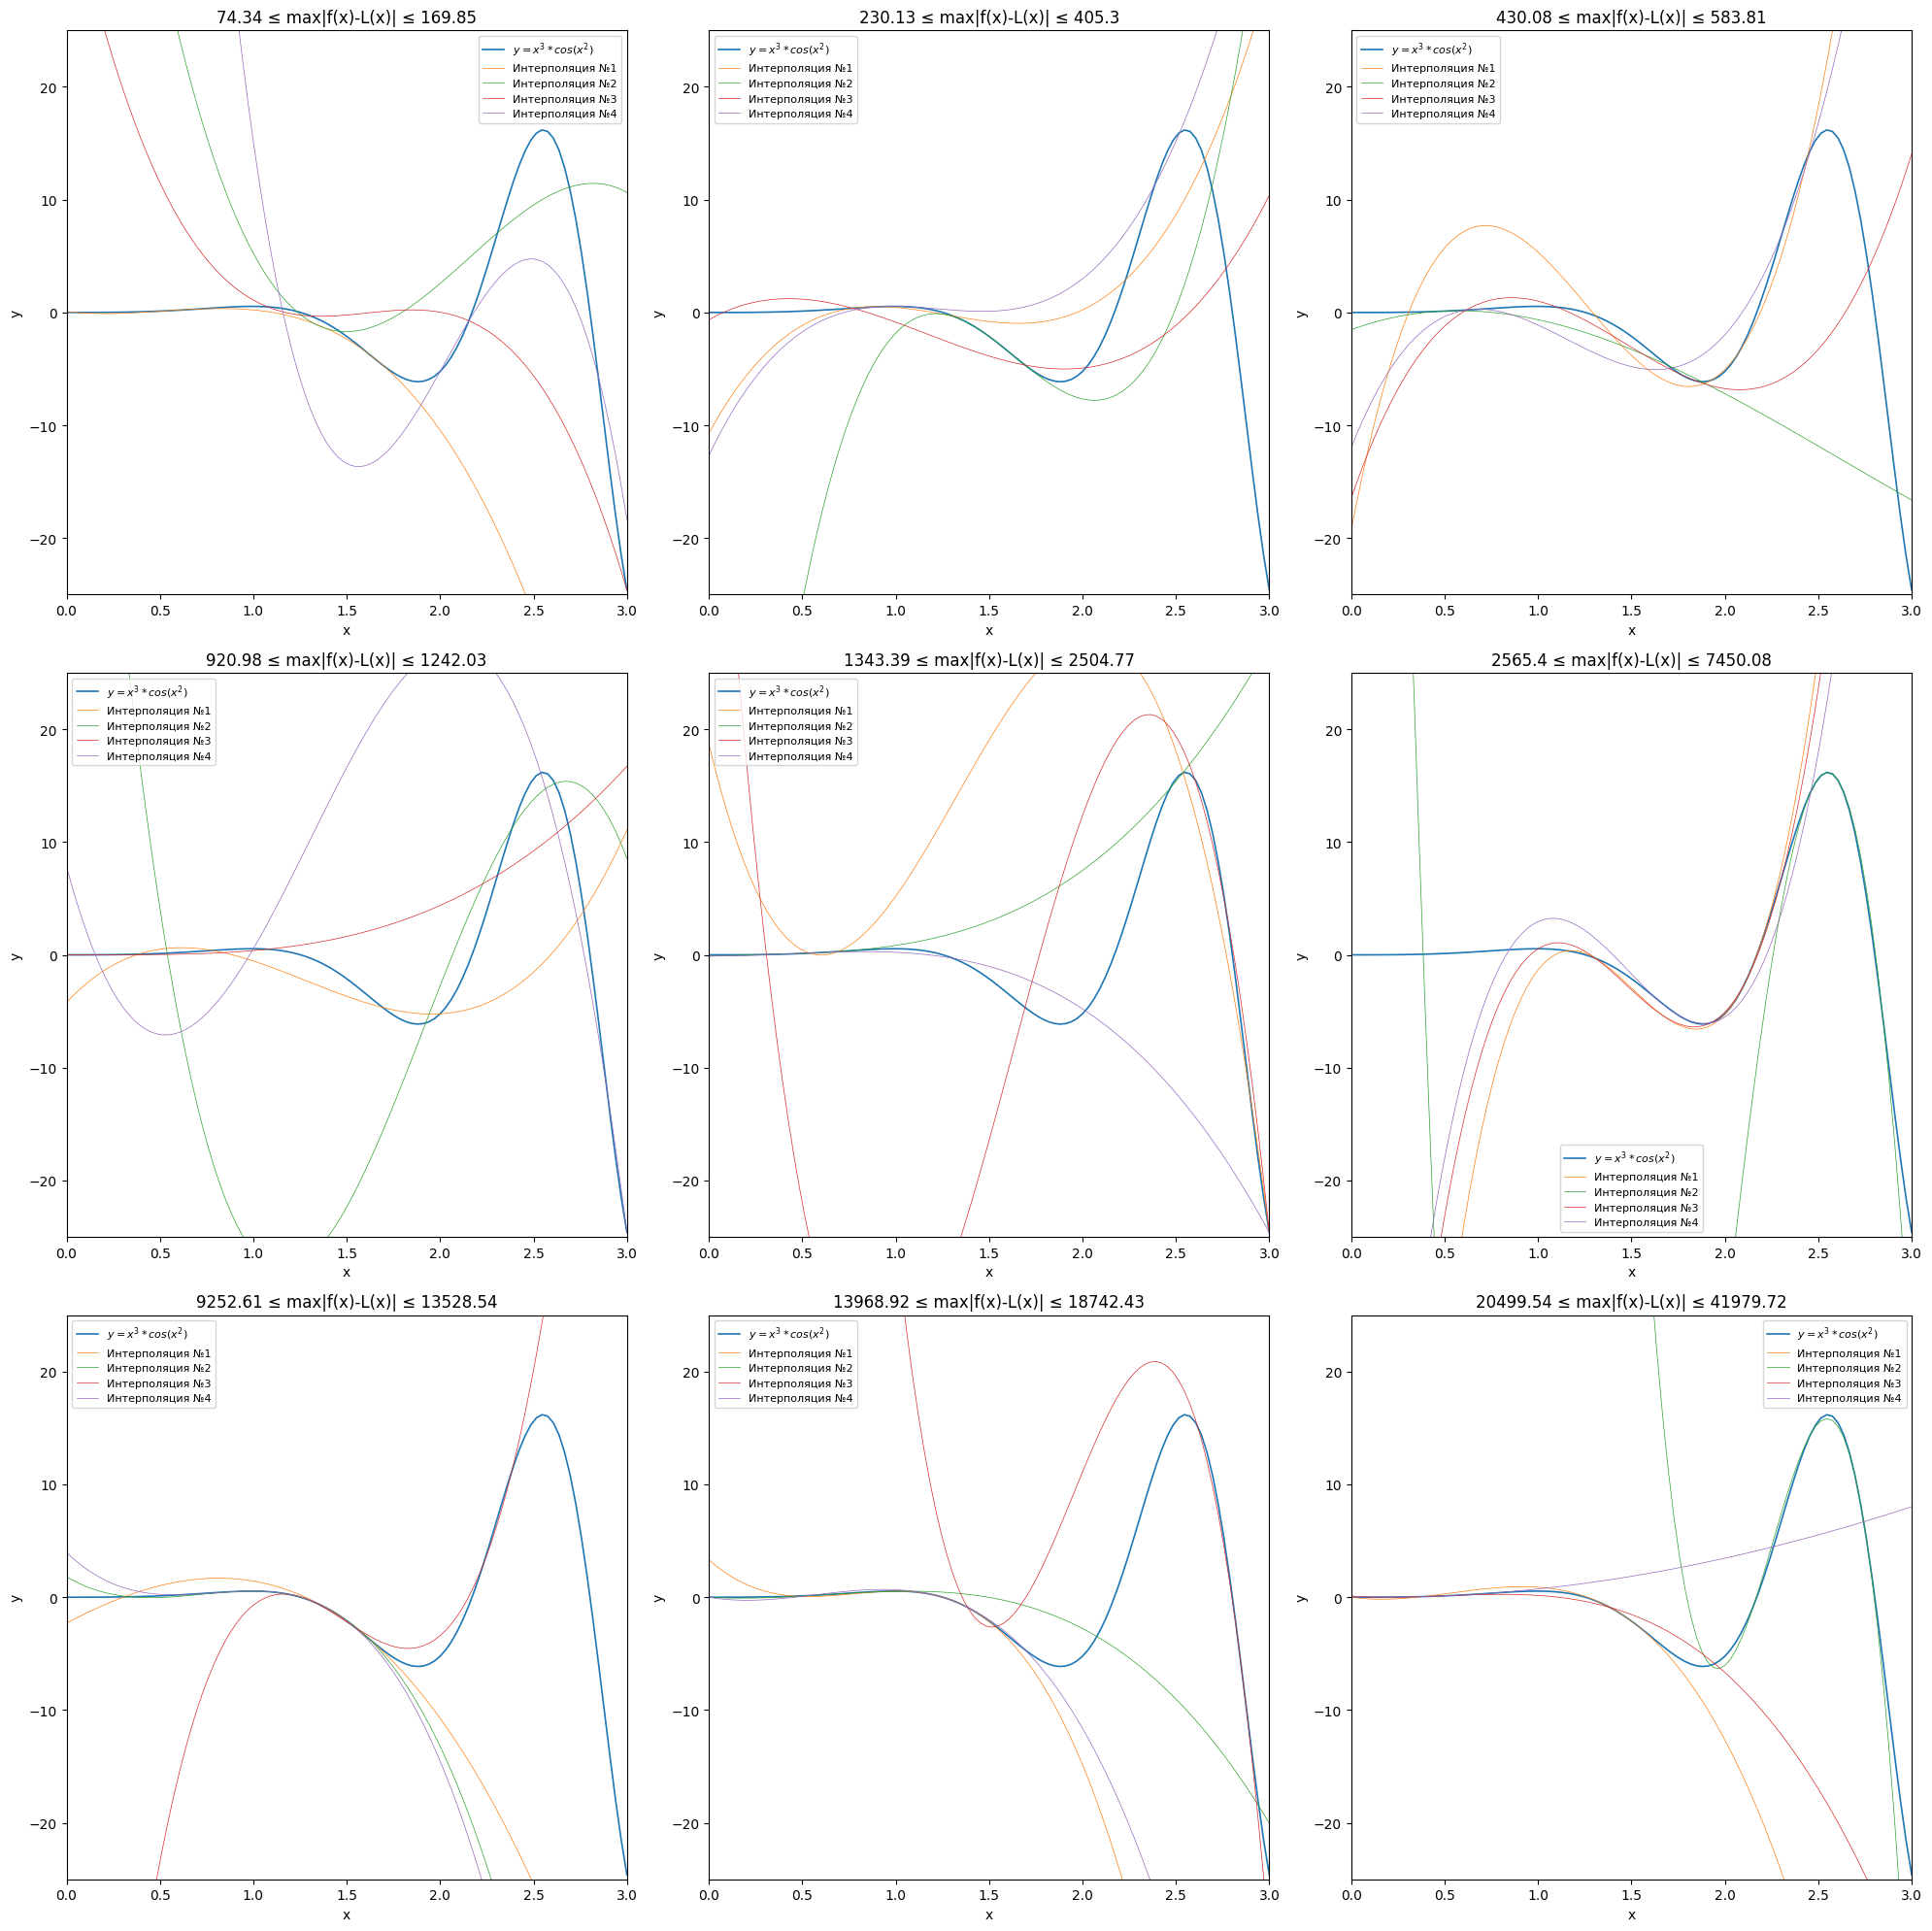

In [638]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), layout="tight")

xlin = np.linspace(0, 3, 100)
ylin = xlin**3*np.cos(xlin**2)

stop1, stop2 = 0, 4
stop_acc1, stop_acc2 = 0, 0
for ax in axs.flatten():
    ax.plot(xlin, ylin,linewidth=1.2, label='$y = x^3*cos(x^2)$')
    
    k = 0
    for i, el in enumerate(dict(sorted(reses.items())[stop1:stop2])):
        if i == 0:
            stop_acc1 = el
        poly = reses[el]
        y_poly = poly(xlin)
        ax.plot(xlin, y_poly, linewidth=0.5, label=f'Интерполяция №{i + 1}')
        k = i
        stop_acc2 = el
    stop1 = stop2
    stop2 = stop2 + k + 1
    ax.set_xlabel("x")
    ax.set_title(f'{round(stop_acc1, 2)} ≤ max|f(x)-L(x)| ≤ {round(stop_acc2, 2)}')
    ax.set_ylabel("y")
    ax.set_xlim(0, 3)
    ax.set_ylim(-25, 25)
    ax.legend(prop={'size': 8})


Интерполяционный многочлен Лагранжа аппроксимирует функцию, проходя через все заданные узлы, тем самым воспроизводя локальные и глобальные особенности исходных данных в рамках интерполяционного интервала.

### 6.9.6

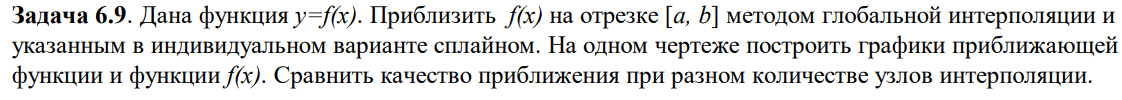

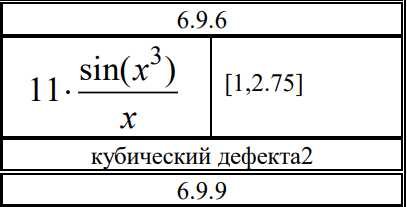

In [384]:
from scipy.interpolate import CubicSpline

In [639]:
def error_rate2(z):
    def w(x_):
        w = 1
        for zi in z:
            w *= x_ - zi
            
        return abs(w)
    
    def df(x_):
        expr = diff(sin(x**3)/x, x, 4)
        f = lambdify(x, expr, "numpy")
        
        return abs(f(x_))
    
    M = df(fminbound(lambda x: -df(x), 1, 2.75))
    res = M/24*w(fminbound(lambda x: -w(x), 1, 2.75))
    
    return res

Количество узлов: 2

max|f(x)-L(x)| ≤ 374.04 для узлов: [1.   2.75]

Количество узлов: 3

max|f(x)-L(x)| ≤ 125.97 для узлов: [1.    1.875 2.75 ]

Количество узлов: 4

max|f(x)-L(x)| ≤ 56.57 для узлов: [1.    1.583 2.167 2.75 ]

Количество узлов: 5

max|f(x)-L(x)| ≤ 11.11 для узлов: [1.    1.438 1.875 2.312 2.75 ]

Количество узлов: 6

max|f(x)-L(x)| ≤ 15.18 для узлов: [1.   1.35 1.7  2.05 2.4  2.75]

Количество узлов: 7

max|f(x)-L(x)| ≤ 2.03 для узлов: [1.    1.292 1.583 1.875 2.167 2.458 2.75 ]

Количество узлов: 8

max|f(x)-L(x)| ≤ 0.97 для узлов: [1.   1.25 1.5  1.75 2.   2.25 2.5  2.75]

Количество узлов: 9

max|f(x)-L(x)| ≤ 2.76 для узлов: [1.    1.219 1.438 1.656 1.875 2.094 2.312 2.531 2.75 ]

Количество узлов: 10

max|f(x)-L(x)| ≤ 0.04 для узлов: [1.    1.194 1.389 1.583 1.778 1.972 2.167 2.361 2.556 2.75 ]



Text(0.5, 0.98, 'Вид интерполяции с помощью кубического сплайна в зависимости от количества узлов\n')

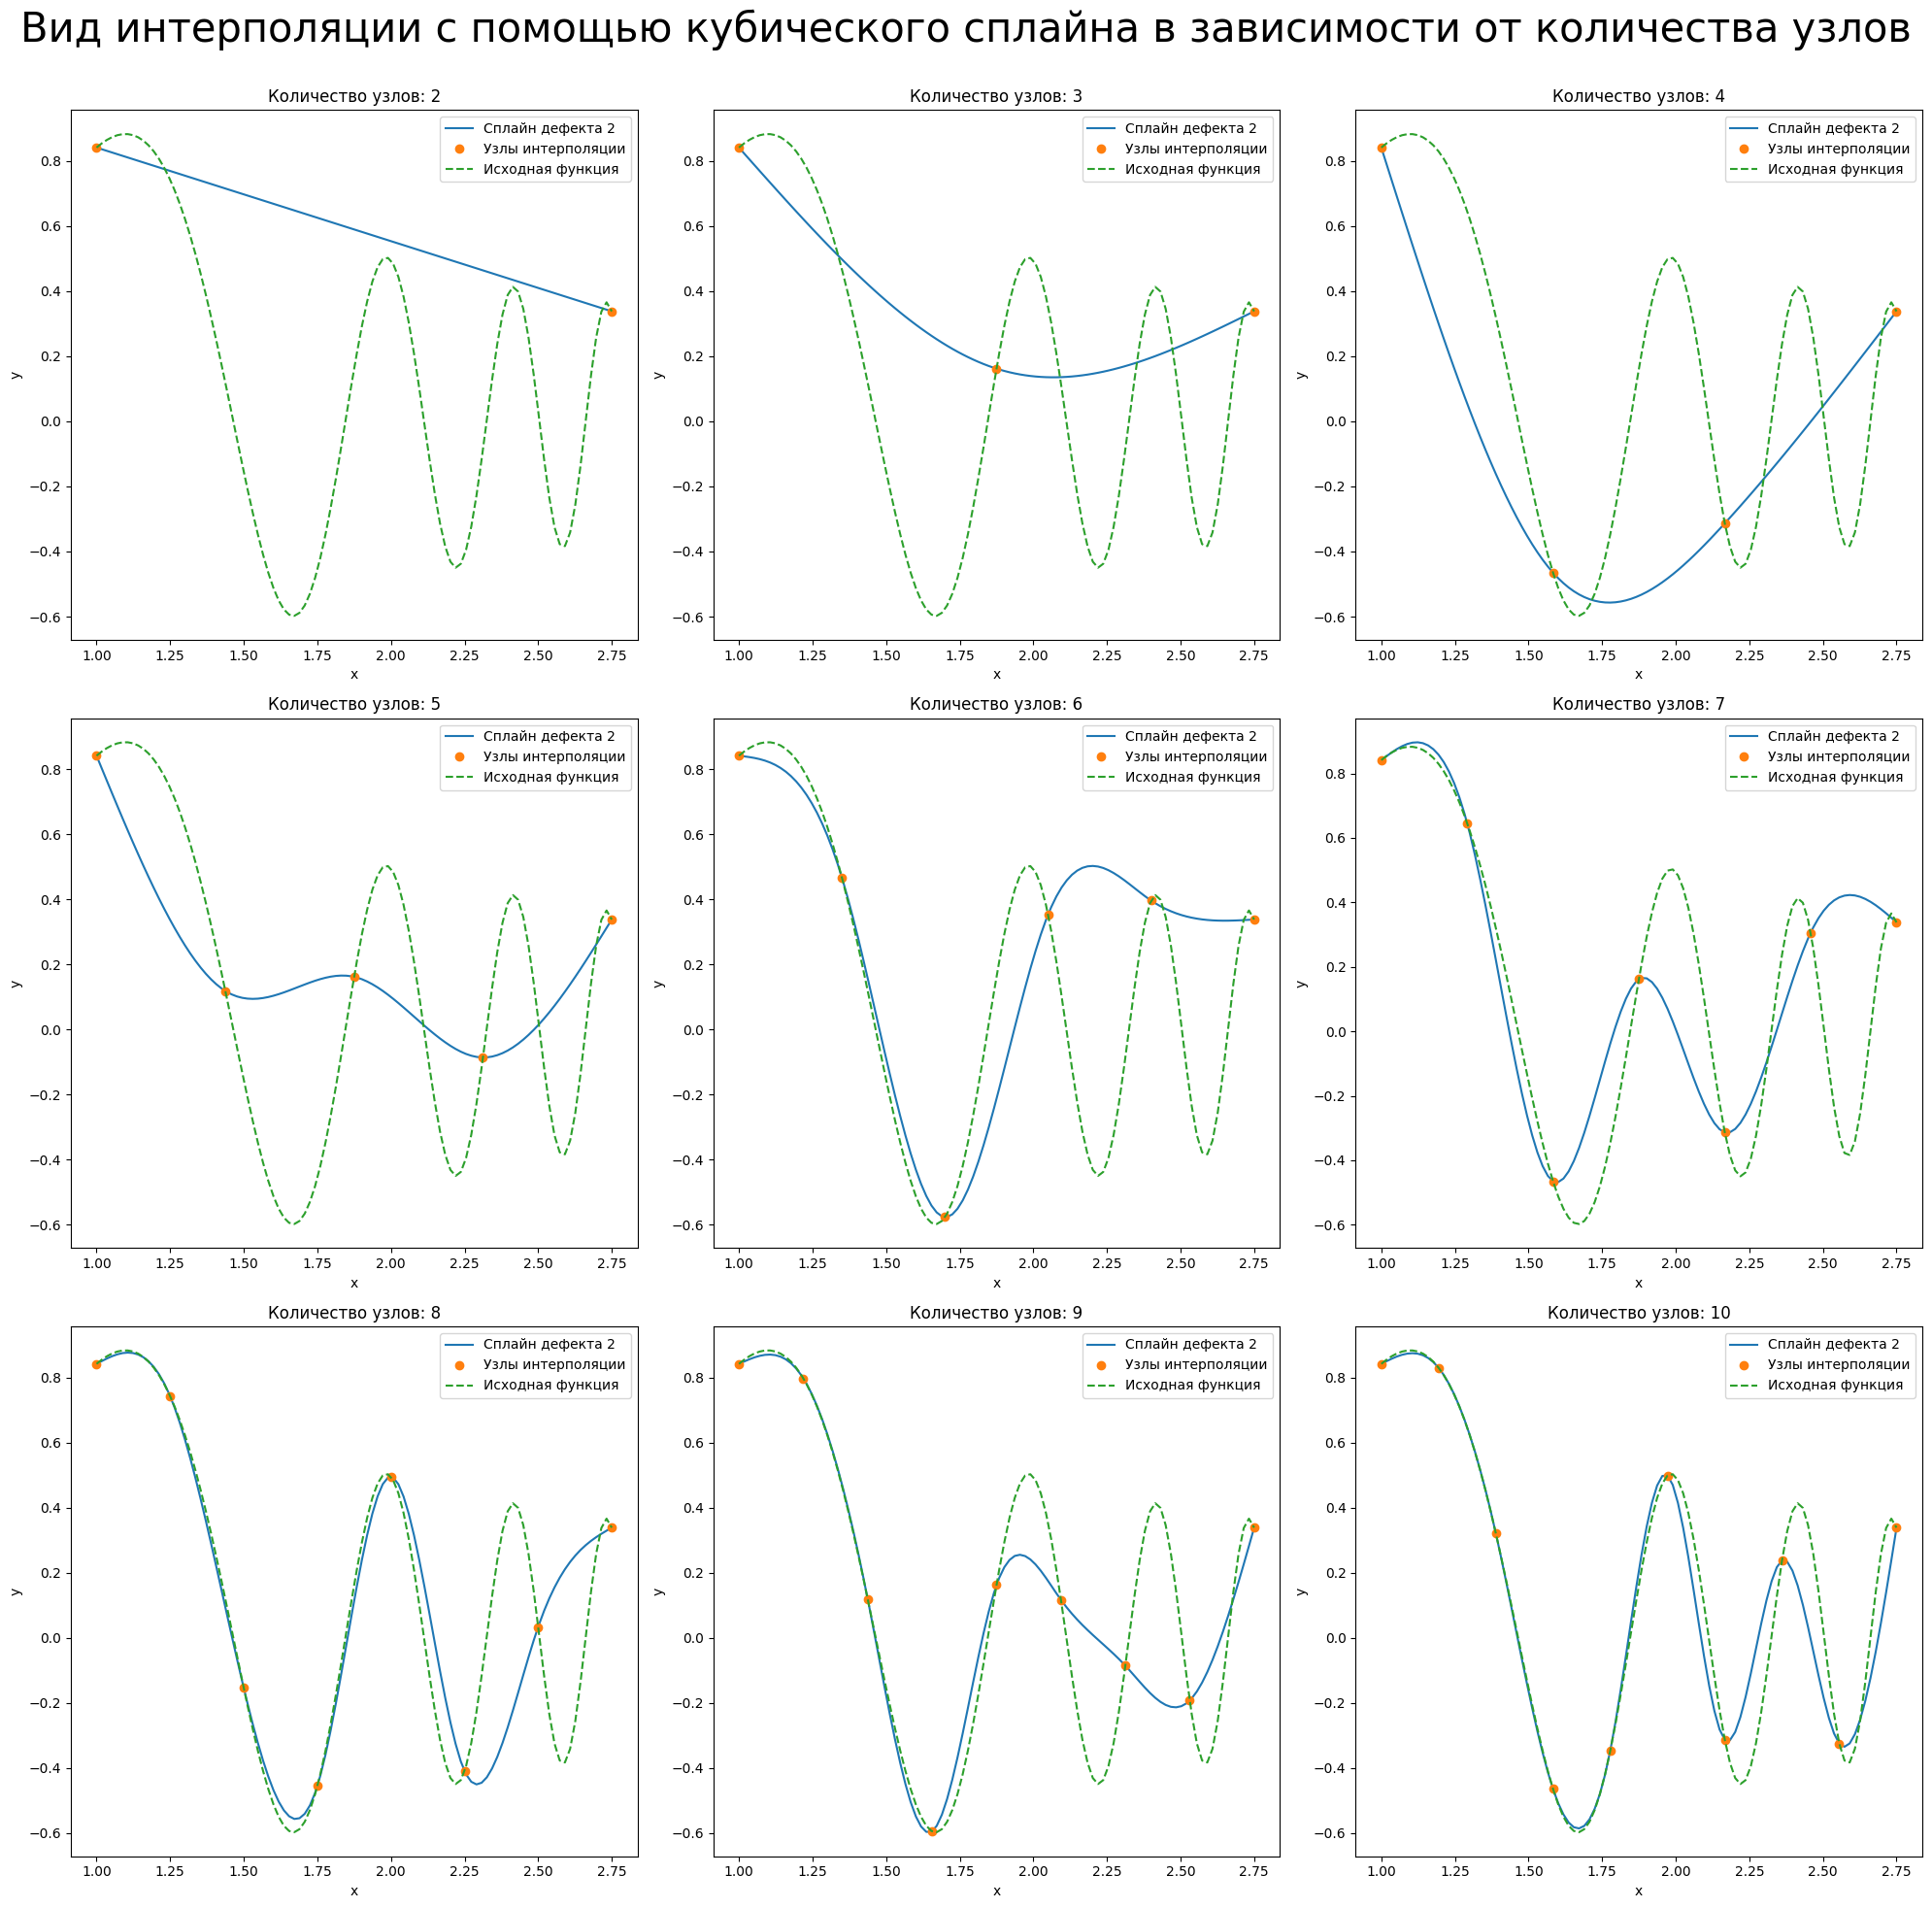

In [640]:
def f(x):
    return np.sin(x**3) / x

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20), layout="tight")
for i, ax in enumerate(axs.flatten()):
    k = i + 2

    x_nodes = np.linspace(1, 2.75, k)
    y_nodes = f(x_nodes)

    cs = CubicSpline(x_nodes, y_nodes, bc_type='natural')

    x_new = np.linspace(1, 2.75, 100)
    y_new = cs(x_new)
    print('\033[1m' + f'Количество узлов: {k}\n' + '\033[0m')
    print(f"max|f(x)-L(x)| ≤ {round(error_rate2(x_nodes),2)} для узлов: {np.round(x_nodes, 3)}\n")
    ax.set_title(f'Количество узлов: {k}')
    ax.plot(x_new, y_new, label='Сплайн дефекта 2')
    ax.plot(x_nodes, y_nodes, 'o', label='Узлы интерполяции')
    ax.plot(x_new, f(x_new), label='Исходная функция', linestyle='--')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
fig.suptitle('Вид интерполяции с помощью кубического сплайна в зависимости от количества узлов\n', fontsize=30)